### Answers to Assignment 4 of 230E

##### Authors(alphabetic order)
1) Ishan Pathak ishan_pathak@berkeley.edu
2) Leonid Maksymenko leo.maksymenko@berkeley.edu
3) Nymph Qiu nymph_qiu@berkeley.edu
4) Xuanzhong Ren rxz19@berkeley.edu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Q1

$$\mathbf{\Phi}(L)\mathbf{Y}_t=\mathbf{e}_t=(\mathbf{I}-\begin{pmatrix}.5 & .1 \\ .4 & .5\end{pmatrix}L - \begin{pmatrix}0 & 0 \\ .25 & 0\end{pmatrix}L^2)\mathbf{Y}_t$$

Let $\det(\mathbf{I}-\begin{pmatrix}.5 & .1 \\ .4 & .5\end{pmatrix}z - \begin{pmatrix}0 & 0 \\ .25 & 0\end{pmatrix}z^2) = 0=\det\begin{pmatrix}1-.5z & -.1z \\ -.4-.25z & 1-.5z\end{pmatrix}=1+.25z^2-z-.04z-.025z^2$

$$z_1=3.258101144562779, z_2=1.3641210776594435$$

We could observe that roots are outside unit circle, which implies that the bivariate process is stationary.

### Q2

(a)

$$\mathbf{X}_t(I-LI) = \gamma \alpha'\mathbf{X}_tL+\Phi_1(L-L^2)\mathbf{X}_t+\epsilon_t$$

$$\Psi(L)\mathbf{X}_t=(I-LI-\gamma\alpha'L-\Phi_1(L-L^2))\mathbf{X}_t=\epsilon_t$$
$$\Psi(L)=I-(I+\gamma\alpha'+\Phi_1)L+\Phi_1L^2$$

We could observe that lag order $p=2$

(b)

$$\Psi(L) = \begin{pmatrix}1-L-\gamma_1L-\phi_{11}L+\phi_{11}L^2 & \gamma_1L-\phi_{12}L+\phi_{12}L^2\\
-\gamma_2L-\phi_{21}L+\phi_{21}L^2 & 1-L+\gamma_2L-\phi_{22}L+\phi_{22}L^2\end{pmatrix}$$

$$\mathbf{X}_t=(I+\gamma\alpha'+\Phi_1)\mathbf{X}_{t-1}-\Phi_1\mathbf{X}_{t-2}+\epsilon_t$$

Because VECM(1) is stationary, then $\Phi_1$ has all eigenvalues less than 1. And because of $\alpha=(1,-1)$, $x_{1,t-1}, x_{2,t-1}$ in $\gamma\alpha'\mathbf{X}_{t-1}$ should enjoy the sum of coefficients = 0.

### Q3

(a)

In [142]:
def sim_q_3(size=1000, lags=1):
    errors = np.random.normal(0,1,size)
    xs = []
    for i in range(size):
        if i == 0:
            xs.append(errors[0])
        else:
            xs.append(0.8*xs[i-1]+errors[i]+0.7*errors[i-1])
    y=xs
    y_lags = []
    y_lags.append(y[0:len(y)-lags])
    y_lags = np.array(y_lags).T
    y_ = np.array(y[lags:]).reshape(len(y_lags),1)
    coef = np.dot(np.dot(np.linalg.inv(np.dot(y_lags.T, y_lags)),y_lags.T),y_)
    if lags == 2:
        coef = np.mean(np.dot(y_lags.T, y_))/np.mean(np.dot(y_lags.T, np.array(y[1:len(y)-1]).reshape(len(y_lags),1)))
        return coef
    residual = y_ - np.dot(y_lags, coef)
    r_squared = np.sum((np.dot(y_lags, coef) - np.mean(y_))**2)/np.sum((y_ - np.mean(y_))**2)
    var = np.sum(residual**2)/(len(y_)-(lags+1))
    hetero_var = np.dot(y_lags.T, np.dot(np.diag(np.diag(np.dot(residual,residual.T))),y_lags))
    beta_homo_var = np.linalg.inv(np.dot(y_lags.T, y_lags))*var
    lhs = np.linalg.inv(np.dot(y_lags.T, y_lags))
    beta_hetero_var = np.dot(np.dot(lhs, hetero_var), lhs.T)
    # beta_nw_var = np.dot(np.dot(lhs, nw_var), lhs.T)
    data = {"type": [],"coef":[], "homo_std":[],"hetero_std":[]}
    log_likelihood = -0.5*np.log(2*np.pi)*len(y_) - (len(y_)-(lags+1))/2 - 0.5 * len(y_) * np.log(var)
    AIC = -2*log_likelihood + 2 * (lags+1)
    BIC = -2*log_likelihood + np.log(len(y_)) * (lags+1)
    return coef[0,0]

In [143]:
phi_sims = [sim_q_3() for i in range(1000)]

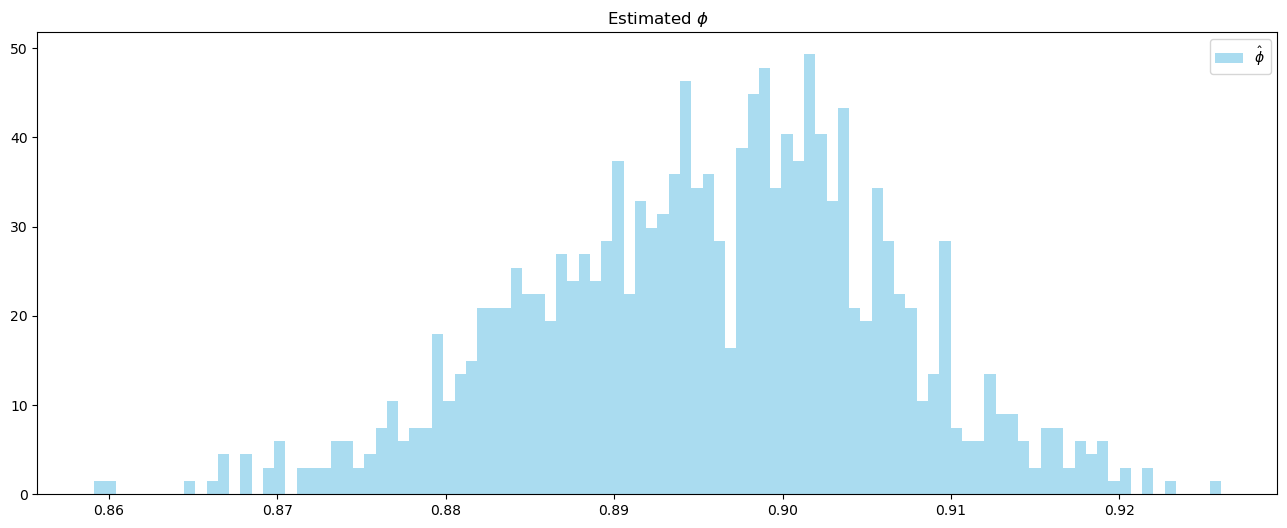

In [144]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
n, bins, patches = axes.hist(phi_sims, 100, density = 1,color ='skyblue',alpha = 0.7, label=r'$\hat{\phi}$')
axes.legend()
axes.set_title(r'Estimated $\phi$')
plt.show()

In [145]:
from scipy.stats import skew
print("skewness:",skew(phi_sims))
print("mean:", np.mean(phi_sims))

skewness: -0.2261513187734386
mean: 0.8955993360271615


We could observe that the estimated $\phi$ is not close to true value 0.8 which is due to serial correlation of error terms. And because of it, the estimator has negative skewness so it has fatter tail on the left hand side of mean value.

(b)

$$x_{t+1}=0.8(0.8x_{t-1}+\epsilon_t+0.7\epsilon_{t-1})+\epsilon_{t+1}+0.7\epsilon_t=0.64x_{t-1}+\epsilon_{t+1}+1.5\epsilon_t+0.56\epsilon_{t-1}$$

In [146]:
phi_sims = [sim_q_3(lags=2) for i in range(1000)]

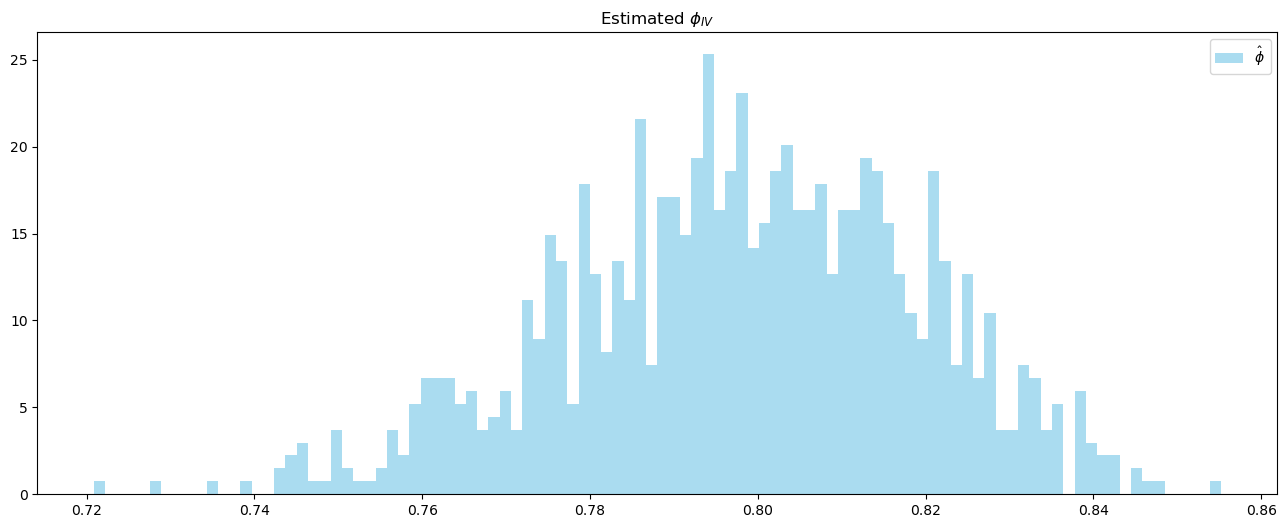

In [147]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
n, bins, patches = axes.hist(phi_sims, 100, density = 1,color ='skyblue',alpha = 0.7, label=r'$\hat{\phi}$')
axes.legend()
axes.set_title(r'Estimated $\phi_{IV}$')
plt.show()

In [148]:
from scipy.stats import skew
print("skewness:",skew(phi_sims))
print("mean:", np.mean(phi_sims))

skewness: -0.27281560175236935
mean: 0.797994349371906


We could observe that $\hat{\phi_{IV}}$ is close to true value 0.8 which shows that instrument variable could make estimator consistent.